**Load in the CIFAR10 Dataset**: This should contain 60,000 32x32 pixel color images, 50k in the training set and 10k in the testing set.

Some things that I found helpful include:
* Start with the simplest possible model and build it up from there
* Obviously you will have to experiment with different network architectures, and one thing you should test out is using convolutional layers. When you do, note how many fewer parameters they use
* After you define your model use `model.compile(...)`, this is where you specify your optimizer and loss function.
* After you compile you can inspect your model and parameter count using `model.summary()`
* Don't forget to include an `input_shape` in the first layer, if you don't you can't use `model.summary()`
* Don't forget to one-hot encode your labels using `from keras.utils import to_categorical`. (And your output shape had better match)
* Normalize or standardize your input values
* Keep an eye on the number of parameters of your model and note when it starts to overfit
* When you call `model.fit` don't forget to pass it `validation_data=(X_test, y_test)` so you can watch the `val_loss` during training
* Save the output of `model.fit` as `history` so you can plot it...
* Plot the train and test loss vs. epochs to visualize overfitting (I provided the basic code below)
* I trained my models for 100 epochs, that seemed to be enough for a first attempt. Once you find one which works well you can certianly try to train it for longer
* Test out different activation functions
* Make sure to use a sensible choice for *output* activation function and loss function
* Train using a GPU for fast iteration (see code below)

Fancier tricks for combatting overfitting ordered by fanciness
* Use keras callbacks such as `ModelCheckpoint` to save the best model you find as measured by `val_loss`, or `EarlyStopping` to avoid wasting time training models which are overfitting
  * If you're using `ModelCheckpoint`, after training load the model in using ```
model = load_model('<path to model>')```. This `load_model` thing can be imported from `keras.models`
  * You have to pass `callbacks=[checkpoint]` to `model.fit()` if you're using `ModelCheckpoint`
  * Defining the checkpoint object you have to specify a file path, I recomend just using 'best_model.keras'. A lot of people reccomend a naming scheme which saves all the best models, but I find it's cleaner to just overwrite them once you improve upon them. Further, people used to use the file format `.h5`, if you see this know that it has been superceeded by `.keras`
* Try using L2 regularization, Dropout, and BatchNorm to combat overfitting
* Test other hyperparameters such as `learning_rate`, `dropout_rate`, `L2_strength`, `batch_size`, etc.
* One other trick to test out is using different initalization schemes for your weights such as `kernel_initializer='he_uniform'` or `'he_normal'`
* For even better performance use data augmentation techniques ie using `ImageDataGenerator` from `keras.preprocessing.image` that I showed in class
* For even better performance you can try using ensembling methods such as Bagging.

I did all but the last two of these tricks to get my performance


I used some combination of these layers (Dropout and BatchNorm will be discussed on Thursday)
* Conv2D Layers
* MaxPool2D Layers
* Dropout Layers
* Batch-Normalization Layers
* Dense (fully connected) Layers
* A Flatten Layer

## The rest is up to you.

This is intended to be a more independent assignment than previous. Now is your chance to show off all those Data scientist skills you've been developing.

### PLEASE READ the notes above before asking me for help!
If you can't figure out how something works consult Stack Overflow or ask ChatGPT. Some copy pasting of code is good behavior: i.e. how exactly ModelCheckpoint works, or boilerplate from our old notebooks. But you **should not copy large segments of code** which are not your own.

I wrote and trained my model essentilly writing all the code from memory supplemented with about a half dozen lines provided by ChatGPT here and there which I understood well. I think this is a good standard to shoot for.

***Scroll down to the bottom to see some of the dataset and my model's performance***


### Secret Sauce for Running on GPU:
(I suggest running on colab for this reason)

In [ ]:
# Check the device name to confirm if GPU is assigned
import tensorflow as tf
print(tf.test.gpu_device_name())

# Get more details about the allocated GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

### Generic code for plotting the loss curves
When they diverge that means overfitting! We want to get that test loss as low as possible

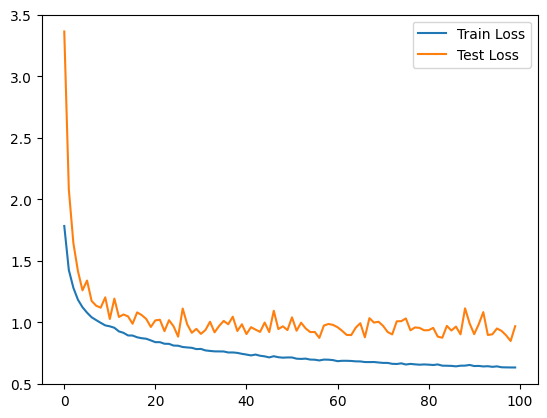

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()

### Use this code to visualize your model's predictions:

313/313 [==============================] - 1s 2ms/step


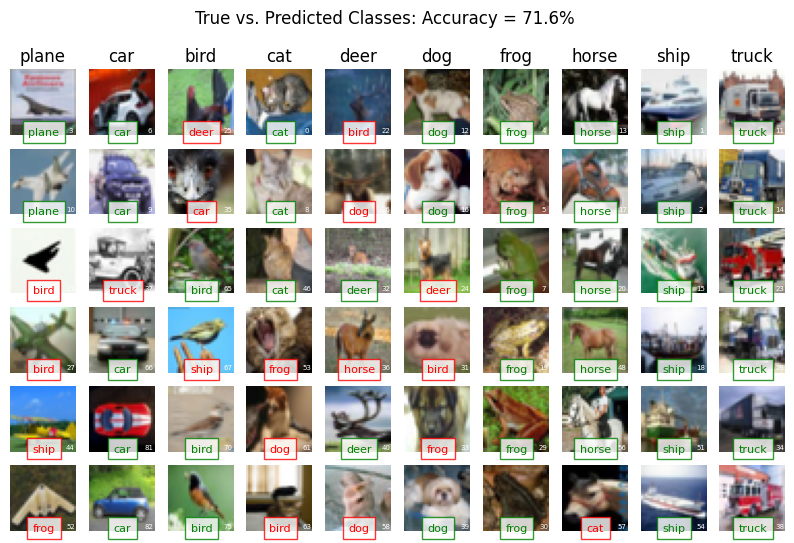

In [ ]:
# Use your model to make predictions HERE:
y_pred = model.predict(X_test)

correct_preds = np.argmax(y_pred, 1) == np.argmax(y_test, 1)

# Get the indices of the first k-occurrences of each class
k=6
sample_inds = [list(np.where(np.where(y_test)[1]==i)[0][:k]) for i in range(10)]

# For each class and occurance plot that image
plt.figure(figsize=[10,6])
for i, l in enumerate(sample_inds):
    for j, sample_index in enumerate(l):
        plt.subplot(k,10,10*j+i+1)
        plt.imshow(X_test[sample_index])
        # And annotate the image with the predicted class colored by correctness
        t = plt.text(16, 30, classes[np.argmax(y_pred[sample_index])], fontsize=8,
                     color= 'green' if correct_preds[sample_index] else 'r',
                     ha='center', va='center')
        t.set_bbox(dict(facecolor='white', alpha=0.8,
                        edgecolor='green' if correct_preds[sample_index] else 'r'))
        # Also print the sample index in the corner
        plt.text(29, 29, str(sample_index), color='w', fontsize=5,
                 ha='center', va='center')
        plt.axis('off')
        if j == 0:
            plt.title(classes[i])

plt.suptitle(f'True vs. Predicted Classes: Accuracy = {100*np.mean(correct_preds):.1f}%')
plt.show()